# Contrôle optimal de l'équation de la chaleur

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
import warnings
import scipy as sp
from scipy import sparse
import scipy.sparse as spsp
from scipy.sparse.linalg import spsolve
m = GEKKO()

On considère une barre unidimensionnelle de longueur $L > 0$. La température de l’extrémité
gauche de la barre $( $ en $x = 0)$ est maintenue à $0 \,^oK$ et on cherche à contrôler la température
de la barre à l’extrémité droite (en x = L) à l’aide d’un flux de chaleur $t \rightarrow u(t)$. On appelle
$y_u(t, x)$ la température de cette barre au temps $t ∈ [0, T]$ et en $x ∈ [0, L]$.

On suppose donc que $y_u$ résout l’équation de la chaleur:

$$\left\{\begin{array}{ll} 
      \partial_t y_u (t,x) - \partial_{xx} y_u (t,x) = 0 \quad (t,x)  \in ]0,T[ \times [0,L] \\
      y_u(0,x) = 0 \quad x \in [0,L]\\
      y_u(t,0) = 0 \quad t \in [0,T] \text{(condition de Dirichlet homogène)}\\
      \partial_x y_u(t,L) = u(t) \quad t \in [0,T] \text{(condition de Neumann non-homogène)}.
      \end{array}
    \right.$$

et on s’intéresse au problème de contrôle optimal

$$inf_{u \in L^2(]0,T[)} \mathbf J(u) \quad où \, \mathbf J(u) = \frac 1 2 \int_0^T \big( y_u(t,L) - z_d(t)\big)^2 dt + \frac {\alpha} {2} \int_0^T u(t)^2 dt   \quad  \quad \quad (P)$$

où $\alpha > 0$ (pour éviter la confusion on note $\alpha$ à la place de $\epsilon$ de l'énoncé) est paramètre fixé et $z_d \in L^2(]0,T[) $ est donnée.

## Question 1:  Différentiabilité et Gradient

**Montrer que J est différentiable:**

    * Lax-Milgram
        * Formulation variationnele a(u,v) = l(v)
        * continuité et coercivité et symétrie
        
    * Montrer que la differentielle noté y'(h) (si elle existe!) est :
        * une application linéaire
        * continue.
        

**Différentielle:**    
Soient $u\in \cal U_{ad}$ et $h$ telle que $u+\epsilon h \in \cal U_{ad}$ si $\epsilon > 0$ est assez petit.
: $$y´(h) = lim_{\epsilon \rightarrow 0} \frac {y(u+\epsilon h) - y(u)}{\epsilon}$$

Notons: $ \delta: = \frac 1 {\epsilon} \big ( y(u+\epsilon h) - y(u) \big)$ satisfait: 

$$\left\{\begin{array}{ll} 
      \partial_t \delta (t,x) - \partial_{xx} \delta (t,x) = 0 \quad  (t,x) \in ]0,T[ \times [0,L] \\
      \delta(0,x) = 0 \quad x \in [0,L]\\
      \delta(t,0) = 0 \quad t \in [0,T]\\
      \partial_x \delta(t,L) = h(t) \quad t \in [0,T] .
      \end{array}
    \right.$$

$\delta$ ne dépend pas de $\epsilon$ donc $\delta = y'(h) = y(h)$ par unicité de la solution (Lax-Milgram).

Puisque $\cal U_{ad} \ni h \rightarrow y_h = y'(h) \in H^1(\Omega) $ est continue alors:

$$L^2(\Omega) \ni v \rightarrow y_v = y(v) \in H^1(\Omega)$$ est différentiable de différentielle: $$y'(h) = \delta = y(h)$$ 

**Calculer le gradient de J en u:**

Soient $u \in \cal U_{ad}$ solution du problème et  $v \in \cal U_{ad}$. par convexité, 
$$(1-\epsilon)u^* + \epsilon v  \in \cal U_{ad}$$$

On a : $$DJ(u).h = y'(v-u) = y'(h)= lim \frac 1 {\epsilon} \big ( y(u+\epsilon (u - v)) - y(u) \big)$$

il vient: $$(\nabla J(u),v-u) = (y(u)- z_d,y(v)-y(u))_{L^2} + \alpha(u,v-u)_{L^2}$$

puis on essaye de réécrire $(y(u)- z_d,y(v)-y(u))_{L^2} $ en fonction de $v-u$

On rappel que y'(h) = y'(v-u)=y(v) -y(u) 

on choisit l'état adjoint p solution d'une équation de la forme:
$$ \partial_t p- \partial_{xx} p = 0 \, (F=0)$$

On multiplie cette équation par p et on intègre:

$$\int_0^T \int_0^L (\partial_t - \partial_{xx} ) y'(v-u) dx dt = \int_0^T \int_0^L (v-u)p dxdt$$

On intégre par partie:

$$ \int_0^T \int_0^L (v-u)p dxdt = $$ $$ \int_0^L p(T,.)y'(v-u) (T,.) +  \int_0^T \int_0^L  (\partial_t - \partial_{xx} )p y'(v-u) dx dt -  \int_0^T \int_0^L \partial \frac {y'(v-u)}{\partial n}p$$

On trouve (F=0):

$$ \int_0^T \int_0^L (v-u)p dxdt = \int_0^L p(T,.)y'(v-u) (T,.) -  \int_0^T \int_0^L \partial \frac {y'(v-u)}{\partial n}p$$

on integre par partie $\int_0^T \int_0^L \partial \frac {y'(v-u)}{\partial n}p$

$$\int_0^T \int_0^L \partial \frac {y'(v-u)}{\partial n}p = \int_0^T \int_0^L \partial \frac {p}{\partial n}y'(v-u)$$

et on identifie $\int_0^T \int_0^L \partial \frac {p}{\partial n}$ à $y(u)-z(u)$ et $P(T,.) = 0$
pour avoir $$(\nabla J(u),v-u) = (y(u)- z_d,y(v)-y(u))_{L^2}$$

et donc:

$$(\nabla J(u),v-u) = (y(u)- z_d,y(v)-y(u))_{L^2}+ \alpha(u,v-u)_{L^2} = \int_0^T \int_0^L (v-u)(p+\alpha u) dxdt $$

Où p = p(u) résoud l'équation de la chaleur rétrograde:

$$\left\{\begin{array}{ll} 
      \partial_t P (t,x) - \partial_{xx} P (t,x) = 0 \quad t \in ]0,T[ \times [0,L] \\
      P(T,x) = 0 \quad x \in [0,L]\\
      P(t,0) = 0 \quad t \in [0,T] \\
      \partial_x P(t,L) = Y_u(t,L) - z_d(t) \quad t \in [0,T].
      \end{array}
    \right.$$

$$\nabla J(u) = p(.,L)+ \alpha u(.)$$

## Question 2:   Méthode numérique de résolution de l’équation de la chaleur

**Description:**

Pour résoudre numériquement les EDP, on propose d’utiliser des méthodes de type différences finies centrées en espace et décentrées en amont en temps. Pour cela on discrétise l’intervalle [0, L] en $N_x + 1$ points, et [0, T] en $N_t + 1$ points. Introduisons $∆x = \frac {L}{N_x}$ et $∆t =\frac {T}{N_t}$, les pas d’espace et de temps de sorte que:
$$x_i = i∆x, i ∈ [0,N_x], \, \, et \quad t^k = k∆t, k ∈ [0,N_t].$$

Soit $y^k_i ≈ y(x_i, t^k)$ pour tout $(i, k) ∈ [0,N_x]\times[0,N_t]$. Des développements de Taylor fournissent:

**Schéma centrées en espace:**
$$y_{xx}(x_i,t^k) ≈ \frac {y_{i+1}^k - 2y_{i}^k + y_{i-1}^k}{\Delta x^2}$$

**Schéma décentrées en amont en temps:**
$$y_{t}(x_i,t^k) ≈ \frac {y_{i}^k - y_{i}^{k-1}}{\Delta t}$$

On rappelle que le schéma implicite est inconditionnellement stable pour toute valeur de ∆t.

**Schéma numérique pour le problème direct (équation de la chaleur):**
Pour le problème suivant:

$$\left\{\begin{array}{ll} 
      \partial_t y_u (t,x) - \partial_{xx} y_u (t,x) = 0 \quad (t,x) \in ]0,T[ \times [0,L] \\
      y_u(0,x) = 0 \quad x \in [0,L]\\
      y_u(t,0) = 0 \quad t \in [0,T] \text{(condition de Dirichlet homogène)}\\
      \partial_x y_u(t,L) = u(t) \quad t \in [0,T] \text{(condition de Neumann non-homogène)}.
      \end{array}
    \right.$$
    
On obtient le schéma numérique:

$$\frac {y_{i}^k - y_{i}^{k-1}}{\Delta t} + \frac {-y_{i+1}^k + 2y_{i}^k - y_{i-1}^k}{\Delta x^2} = 0$$

De plus, en utilisant la condition de Dirichlet $y_0 = 0$, on a:

$$\frac {y_{1}^k - y_{1}^{k-1}}{\Delta t} + \frac {2y_{1}^k - y_{2}^k}{\Delta x^2} = 0$$

Pour le bord Neumann, on utilise une approximation de la dérivée à l’ordre 1. Par développement
de Taylor autour de $y^k_{N+1}$  on obtient $y^k_{N+1}≈ y^k_{N} +\delta_x y(L,t^k) \Delta x $
et en ré-injectant ce résultat dans le schéma, on a alors pour i = N:

$$\frac {y_{N}^k - y_{N}^{k-1}}{\Delta t} + \frac {-y_{N-1}^k + y_{N}^k}{\Delta x^2} = \frac {u(t^k)}{\Delta x}$$

Désignons par I la matrice identité, le schéma s’écrit donc sous forme matricielle:

$$Y^k - Y^{k-1} + \frac {\Delta t}{\Delta x^2}AY^k = \frac {\Delta t}{\Delta x} b^k, \quad \forall k \in [0,N_t]$$

Soit:

$$\big( I + \frac {\Delta t}{\Delta x^2}A \big)Y^k = \frac {\Delta t}{\Delta x}b^k + Y^{k-1}, \quad \forall k \in [0,N_t]$$

et:

$$Y^k = \begin{bmatrix}
    y_1^k \\
    \vdots \\
    y_i^k  \\
    \vdots \\
    y_N^k
    \end{bmatrix}, \; A = \begin{bmatrix}
                        2 & -1 & 0 & \ldots &0\\
                         -1 &  2 & \ddots &\ddots & \vdots\\
                        0 & \ddots& \ddots & \ddots&0\\
                        \vdots & \ddots& \ddots & 2&-1 \\
                        0 & \ldots & 0 & -1&1
                        \end{bmatrix}, \; et \quad b^k =  \begin{bmatrix}
                                                                0\\
                                                                \vdots \\
                                                                0  \\
                                                                \vdots \\
                                                                u(t^k)
                                                                \end{bmatrix} $$




**Implémentaion:**

On stock la matrice creuse $\big( I + \frac {\Delta t}{\Delta x^2}A \big)$ en format `csr` dans la methode `A_csr()` de la class `FD_heat` ci-dessous. On fait de même pour $\frac {\Delta t}{\Delta x}b^k $ pour chaque itération dans la méthode `b_csr()` et on résoud le probléme linéaire pour chaque itération en temps: `self.iter += 1`.

In [301]:
class FD_heat:
    def __init__(self,Nx,Nt,L,T,u=np.ones(10)):
        #assert Nx == Nt,"les dimension doit être égales!"
        self.Nx = Nx
        self.Nt = Nt
        self.T = T
        self.L = L
        self.u = u
        
        self.start()

    def start(self):
        self.dt = self.T/self.Nt
        self.dx = self.L/self.Nx
        self.iter = 1
        self.Y = np.zeros((self.Nx,self.Nt)) #y(0,x) = y(t,0)=0
        self.A_csr()
        
    def verification(self,cst):
        self.Y[:,0]=cst*np.linspace(0,L,self.Nx) #y=cst*x ->y(0,x)=cst*x
        self.u = cst*np.ones(self.Nt) #dy/dx = cst

    def A_csr(self):
        """i=j"""
        diag = 2*np.ones(self.Nx)
        diag[-1]=1
        diag =diag*self.dt/self.dx**2 + 1
        
        """i=j+1"""
        diagsup = -1*np.ones(self.Nx-1)
        diagsup *=self.dt/self.dx**2 
        """i=j-1"""
        diaginf = -1*np.ones(self.Nx-1)
        diaginf *=self.dt/self.dx**2 
        self.A = spsp.diags([diag,diagsup,diaginf],[0,1,-1,],format="csr")
        
    def next_iter(self):
        self.iter = self.iter + 1
        
    def b_csr(self):
        self.b = np.zeros(shape=[self.Nx,1])
        self.b[-1] = self.u[self.iter]*self.dt/self.dx
        #self.b = sparse.csr_matrix(self.b) 
        
    '''solve for the kth time step'''
    def solve(self):
        
        self.b_csr()
        
        second_terme = self.b + self.Y[:,self.iter-1:self.iter]
       
        self.Y[:,self.iter] = spsolve(self.A,second_terme)
        
        self.next_iter()
        
        return self
    

**Vérifcation (cas stationnaire):**


Soit $$y(t,x) = 5x \quad \forall (t,x) \in ]0,T[\times]0,L[$$

avec: $$ y(t,0) = 0$$
et : $$y(0,x) = 5x$$
On injecte $y(t,x)$ dans $\partial_t y_u (t,x) - \partial_{xx} y_u (t,x)$

Soit:

$$\partial_t y_u (t,x) - \partial_{xx} y_u (t,x) = 0$$

Il ne reste qu'injecter la solution qu'on a proposé dans la condition de neumann afin d'obtenir un contrôl $u(.)$ pour tester et comparer avec la solution différence finie.

$$u(t) = \partial_xy_u(t,L) = 5$$

la fonction en dessous 'test_FD_heat' fait appel à une méthode `verification()`de la class `FD_heat` qui a pour objective de réinitialiser la solution pour satisfaire le problème. On compare le résultat avec la solution exacte affiché en dessous.

In [302]:
def test_FD_heat(Nx,Nt,L,T,u,cst,verif = True):

    test = FD_heat(Nx,Nt,L,T,u)
    '''version de verification'''
    if verif:
        test.verification(cst)
    
    '''solution differece finies'''
    for i in range(1,Nt):
        test = test.solve()
    sol_FD = test.Y
        
    '''solution exacte'''
    sol_exact = np.zeros((Nx,Nt))
    for i in range(Nt):
        sol_exact[:,i]= cst*np.linspace(0,L,Nx)
    
    if verif:
        print("\n------------------la solution exacte est ------------------\n",sol_exact )
    print("\n--------------la solution différences finies---------------\n",sol_FD )
    return sol_exact,sol_FD

**Initialisation:**

In [304]:
Nx = 4
Nt = 4
L = 1
T = 2
u = 5*np.ones(Nt)
sol_exact,sol_FD = test_FD_heat(Nx,Nt,L,T,u,5)


------------------la solution exacte est ------------------
 [[0.         0.         0.         0.        ]
 [1.66666667 1.66666667 1.66666667 1.66666667]
 [3.33333333 3.33333333 3.33333333 3.33333333]
 [5.         5.         5.         5.        ]]

--------------la solution différences finies---------------
 [[0.         1.054106   1.18852853 1.22248069]
 [1.66666667 2.23997524 2.39385988 2.4492054 ]
 [3.33333333 3.49750806 3.6184268  3.6828483 ]
 [5.         4.77556272 4.85810857 4.92454388]]


**Commentaire:**
    
La métode marche correctement! pour plus de précision il faut augmenter le nombre de points de discrétisation.

## Question 3:

Appelons p, l’état adjoint introduit pour calculer le gradient de J. On appelle q la fonction
définie sur [0, T] × [0, L] par q(t, x) = p(T − t, x). Quelle est l’équation satisfaite par q ?

Soit P l'adjoint qui résoud le problème adjoint suivant:

$$\left\{\begin{array}{ll} 
      \partial_t P (t,x) - \partial_{xx} P (t,x) = 0 \quad t \in ]0,T[ \times [0,L] \\
      P(T,x) = 0 \quad x \in [0,L]\\
      P(t,0) = 0 \quad t \in [0,T] \\
      \partial_x P(t,L) = Y_u(t,L) - z_d(t) \quad t \in [0,T].
      \end{array}
    \right.$$

$\iff$

$$\left\{\begin{array}{ll} 
      \partial_t P (T − t,x) - \partial_{xx} P (T − t,x) = 0 \quad t \in ]0,T[ \times [0,L] \\
      P(T,x) = 0 \quad x \in [0,L]\\
      P(T − t,0) = 0 \quad t \in [0,T] \\
      \partial_x P(T − t,L) = Y_u(T − t,L) - z_d(T − t) \quad t \in [0,T].
      \end{array}
    \right.$$
    
Soit q(t, x) = P(T − t, x), alors en particulier q (0,x) = P(T,x) et q satisfait l'équation suivante:

$$\left\{\begin{array}{ll} 
      \partial_t  q(t, x) - \partial_{xx}  q(t, x) = 0 \quad t \in ]0,T[ \times [0,L] \\
      q(0, x) = 0 \quad x \in [0,L]\\
      q(t, x) = 0 \quad t \in [0,T] \\
      \partial_x  q(t, L) = Y_u(T − t,L) - z_d(T − t) \quad t \in [0,T].
      \end{array}
    \right.$$
    
Donc q satisfait une équation de chaleur du même type que le problème direct et par conséquent p(x,t) est solution de l'équation de chaleur rétrograde.

Par analogie on a donc:

$$\big( I + \frac {\Delta t}{\Delta x^2}A \big)q^k = \frac {\Delta t}{\Delta x}c^k + q^{k-1}, \quad \forall k \in [0,N_t]$$

et:

$$q^k = \begin{bmatrix}
    q_1^k \\
    \vdots \\
    q_i^k  \\
    \vdots \\
    q_N^k
    \end{bmatrix}, \; A = \begin{bmatrix}
                        2 & -1 & 0 & \ldots &0\\
                         -1 &  2 & \ddots &\ddots & \vdots\\
                        0 & \ddots& \ddots & \ddots&0\\
                        \vdots & \ddots& \ddots & 2&-1 \\
                        0 & \ldots & 0 & -1&1
                        \end{bmatrix}, \; et \quad c^k =  \begin{bmatrix}
                                                                0\\
                                                                \vdots \\
                                                                0  \\
                                                                \vdots \\
                                                                Y_u(T-t^k) - z_d((T-t^k))
                                                                \end{bmatrix} $$

**Méthode de calcul du gradient de J en u:**
 * d'abord résoudre le problème direct -> Y
 * ensuite résoudre le problème rétrograde -> q -> P
 * pour finalement pouvoir calculer le gradient 

## Question 4: Résoudre numériquement le problème (P)

**Initialisation:**
    * Calculer Y (solution de l'équation de la chaleur pour un `u` initial)
    * Calculer l'adjoint P (solution de l'équation d'adjoint)
    * Calcule des termes de normalisation la fonctionnelle (la normalisation s'effectue ddans chaque calcul du gradient ou de la fonctionnelle)
    *Valeur initiale du critère d'arrêt de la boucle suivante
    
**Répéter tant que le critère d'arrêt n'est pas satisfait:**
    * Calcul du gradient de la fonctionnelle en u
    * Recalculer la solution Y à partir de la descente du gradient `u - rho * gradient`
    * Calculer le critère d'arrêt de la boucle pour trouver un `rho` optimal
    * Faire une boucle sur `rho` afin d'en trouver la valeure optimale
    * Calculer Y (solution de l'équation de la chaleur pour un `u` initial)
    * Calculer l'adjoint P (solution de l'équation d'adjoint)
    * Calculer la nouvelle valeure du critère d'arrêt (i.e. erreur relative de la fonctionnelle)
    

On rappel que:

$$\nabla J(u) = p(.,L)+ \alpha u(.)$$

In [158]:
def gradient_J(sol_p,u_vec,alpha = 1):
    
    p_L = sol_p[-1,:].reshape(-1)
    u_vec = u_vec.reshape(-1)
    gradient = sol_p[-1,:] + alpha*u_vec
    
    return gradient


In [159]:
def solve_Y(Nx,Nt,L,T,u):

    FD = FD_heat(Nx,Nt,L,T,u)
    
    '''solution differece finies'''
    for i in range(1,Nt):
        FD = FD.solve()
    sol_y = FD.Y

    #print("\n--------------la solution différences finies de Y---------------\n",sol_FD )
    
    return sol_y

In [160]:
def solve_P(sol_y,Nx,Nt,L,T,zd):
    
    '''changement de variable'''
    sol_y_prime = sol_y[:,::-1]#t'->T-t
    y_z = sol_y_prime[-1,:].reshape(-1)
    zd = zd.reshape(-1)
    y_z = y_z - zd
    
    FD = FD_heat(Nx,Nt,L,T,y_z)
    '''solution differece finies'''
    for i in range(1,Nt):
        FD = FD.solve()
    sol_q = FD.Y
    
    '''rechangement de variable'''
    sol_p = sol_q[:,::-1]

    #print("\n--------------la solution différences finies de P---------------\n",sol_p )
    
    return sol_p

**Calcule de $J(u)$ (méthode des réctangles):**

In [170]:
def J(sol_y,zd,u,T,alpha=1):
    somme = 0
    assert len(u)==len(zd),"Problème de dimension!"
    nb = len(u)
    h = T / nb
    Y_L = sol_y[-1,:]
    Y_L = Y_L.reshape(-1)
    for i in range(0, nb):
        somme += ((Y_L[i] - zd[i])**2)*h/2 +alpha*u[i]**2* h/2
       
    return somme

In [192]:
def gradient_edp(Nx,Nt,L,T,zd,u,alpha=1):
    liste_J = []
    """initialisation de Y puis P et L (normalisé)"""
    sol_y = solve_Y(Nx,Nt,L,T,u)
    sol_p = solve_P(sol_y,Nx,Nt,L,T,zd)
    #L_g,L_f = L_avg(SIR,u,cas)#constantes de normalisation
    #print(L_g,L_f)

    liste_J.append(J(sol_y,zd,u,T,alpha))
    
    """Résoudre inf_u J"""
    epstol = 1e-11
    err = 1
    rho = 2
    iteration=0
    iterMax = 100
    delta = 1
    while err > epstol and iteration < iterMax:
        """calculer rho """
        cpt = 0
        gradient = gradient_J(sol_p,u,alpha)
        sol_y = solve_Y(Nx,Nt,L,T,u - rho * gradient)
        
        delta = J(sol_y,zd,u,T,alpha=1) - liste_J[-1]
        while cpt < 100 and delta >= 0:
            rho /= 1.3
            sol_y2 = solve_Y(Nx,Nt,L,T,u - rho * gradient)
            delta = J(sol_y2,zd,u,T,alpha) - liste_J[-1]
            cpt += 1

        """ mise à jour de u """
        u = u - rho * gradient
        
        '''calcul de y(u) et de l'adjoint p'''
        sol_y = solve_Y(Nx,Nt,L,T,u - rho * gradient)
        sol_p = solve_P(sol_y,Nx,Nt,L,T,zd)
        
        liste_J.append(J(sol_y,zd,u,T,alpha))
        err = abs((liste_J[-1] - liste_J[-2]) / liste_J[-2])
        iteration += 1

    print("on a fait ",iteration, "pour converger vers u optimale")
    return sol_y,u,liste_J,iteration

In [219]:
Nx = 100
Nt = 100
L = 2
T = 0.1
u = 2*np.ones(Nt)
zd = np.ones(Nt)
alpha = 1

In [220]:
sol_y,u,liste_J,iteration = gradient_edp(Nx,Nt,L,T,zd,u)

on a fait  4 pour converger vers u optimale


**Le contôle optimale:**

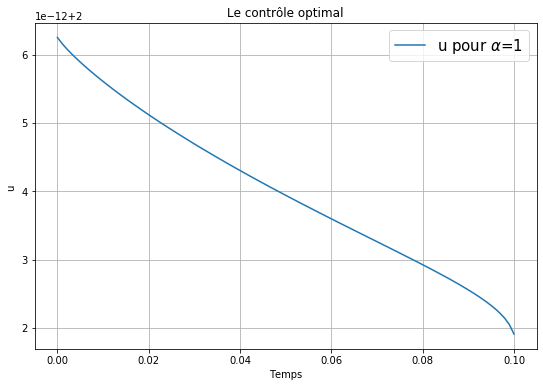

In [218]:
fig, ax = plt.subplots(figsize=(9,6))
ax.set(xlabel='Temps', ylabel=r'u ', \
       title= "Le contrôle optimal")
ax.plot(np.linspace(0,T,Nt),u,label=r'u pour $\alpha$='+str(alpha))
ax.grid(True)
ax.legend(loc='best',fontsize=15);

**Le critère $J$:**

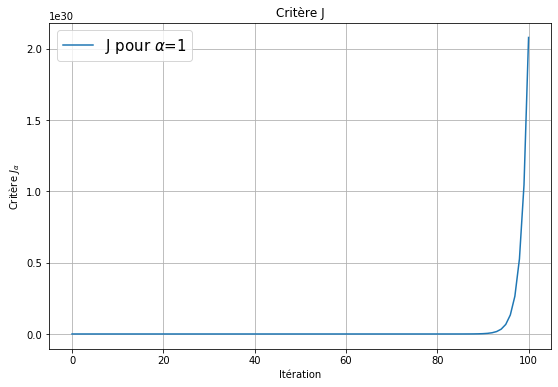

In [201]:
fig, ax = plt.subplots(figsize=(9,6))
ax.set(xlabel='Itération', ylabel= r"Critère $J_{\alpha}$",\
       title= "Critère J")
ax.plot(range(iteration+1),liste_J,label=r'J pour $\alpha$='+str(alpha))
ax.grid(True)
ax.legend(loc='best',fontsize=15);

## Question 5: Tester l'algorithme

**Tester sur diverses valeurs de $\alpha$:**

In [264]:
Nx = 100
Nt = 100
L = 2
T = 2
u = 1*np.ones(Nt)
zd = np.ones(Nt)
alphas = [0,0.01,0.5,1,2,4,1000]

on a fait  100 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale


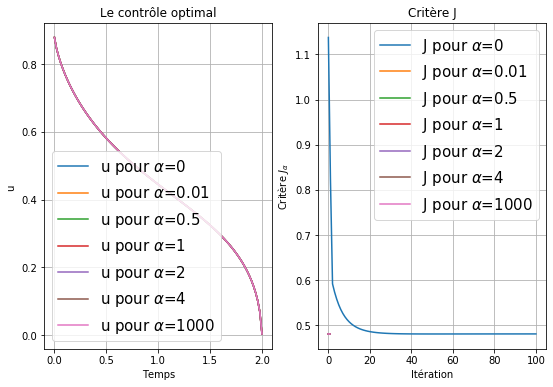

In [265]:
fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2,figsize=(9,6))
for alpha in alphas:
    sol_y,u,liste_J,iteration = gradient_edp(Nx,Nt,L,T,zd,u)
    
    '''controle'''
    ax.set(xlabel='Temps', ylabel=r'u ', \
           title= "Le contrôle optimal")
    ax.plot(np.linspace(0,T,Nt),u,label=r'u pour $\alpha$='+str(alpha))
    ax.grid(True)
    ax.legend(loc='best',fontsize=15);
    
    '''J'''
    ax1.set(xlabel='Itération', ylabel= r"Critère $J_{\alpha}$",\
           title= "Critère J")
    ax1.plot(range(iteration+1),liste_J,label=r'J pour $\alpha$='+str(alpha))
    ax1.grid(True)
    ax1.legend(loc='best',fontsize=15);

**Commentaire:**

$\alpha$ semble avoir une influence sur la convergeance sans perturber la solution du problème. En effet, quand $\alpha > 0 $ on covergence en une iteration.

**Tester sur diverses valeurs de $T$:**

In [266]:
Nx = 100
Nt = 100
L = 2
Ts = [0.1,0.5,1,2,10]
u = 1*np.ones(Nt)
zd = np.ones(Nt)
alpha = 1

on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  100 pour converger vers u optimale
on a fait  48 pour converger vers u optimale


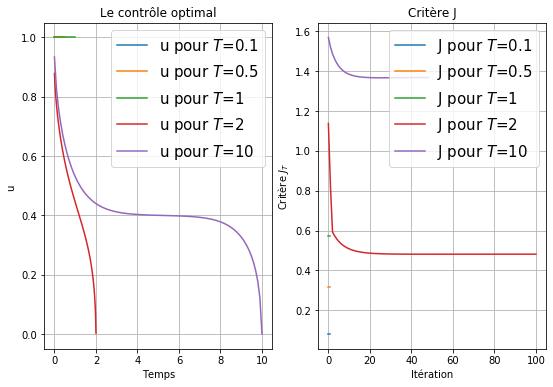

In [267]:
fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2,figsize=(9,6))
for T in Ts:
    sol_y,u,liste_J,iteration = gradient_edp(Nx,Nt,L,T,zd,u)
    
    '''controle'''
    ax.set(xlabel='Temps', ylabel=r'u ', \
           title= "Le contrôle optimal")
    ax.plot(np.linspace(0,T,Nt),u,label=r'u pour $T$='+str(T))
    ax.grid(True)
    ax.legend(loc='best',fontsize=15);
    
    '''J'''
    ax1.set(xlabel='Itération', ylabel= r"Critère $J_{T}$",\
           title= "Critère J")
    ax1.plot(range(iteration+1),liste_J,label=r'J pour $T$='+str(T))
    ax1.grid(True)
    ax1.legend(loc='best',fontsize=15);

**Commentaire:**

T a une grande influence sur la convergeance et la solution u également. 

**Tester sur diverses valeurs de $z_d$:**

In [269]:
Nx = 100
Nt = 100
L = 2
T = 0.1
u = 1*np.ones(Nt)
zds = [0,1,2,5,10]
alpha = 1

on a fait  100 pour converger vers u optimale
on a fait  3 pour converger vers u optimale
on a fait  1 pour converger vers u optimale
on a fait  3 pour converger vers u optimale
on a fait  3 pour converger vers u optimale


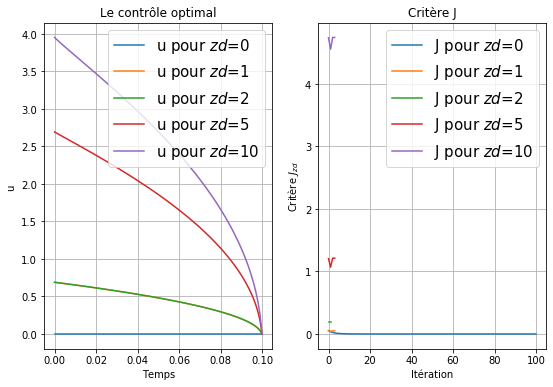

In [270]:
fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2,figsize=(9,6))
for zd_ in zds:
    zd = zd_*np.ones(Nt)
    
    sol_y,u,liste_J,iteration = gradient_edp(Nx,Nt,L,T,zd,u)
    
    '''controle'''
    ax.set(xlabel='Temps', ylabel=r'u ', \
           title= "Le contrôle optimal")
    ax.plot(np.linspace(0,T,Nt),u,label=r'u pour $zd$='+str(zd_))
    ax.grid(True)
    ax.legend(loc='best',fontsize=15);
    
    '''J'''
    ax1.set(xlabel='Itération', ylabel= r"Critère $J_{zd}$",\
           title= "Critère J")
    ax1.plot(range(iteration+1),liste_J,label=r'J pour $zd$='+str(zd_))
    ax1.grid(True)
    ax1.legend(loc='best',fontsize=15);

**Commentaire:**

Quand $z_d$ est grand on a convergeance rapide comparement à zd = 0 par exemple qui demande plus que 100 itérations.Ceci est dû au fait que, la fonctionnelle est proche de 0.

**Éxaminons un cas où $z_d$ est trés grand:**

In [310]:
Nx = 100
Nt = 100
L = 2
T = 0.1
u = 10*np.ones(Nt)
zds = [100]
alpha = 1

on a fait  3 pour converger vers u optimale


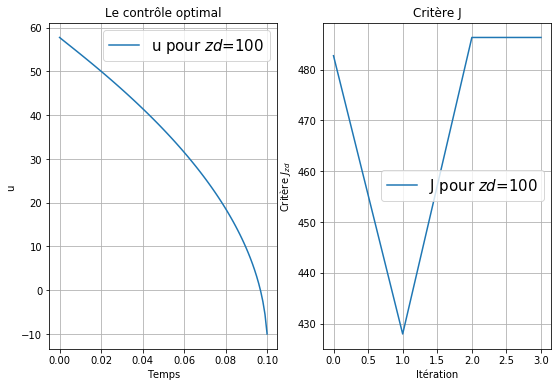

In [311]:
fig, (ax,ax1) = plt.subplots(nrows=1, ncols=2,figsize=(9,6))
for zd_ in zds:
    zd = zd_*np.ones(Nt)
    
    sol_y,u,liste_J,iteration = gradient_edp(Nx,Nt,L,T,zd,u)
    
    '''controle'''
    ax.set(xlabel='Temps', ylabel=r'u ', \
           title= "Le contrôle optimal")
    ax.plot(np.linspace(0,T,Nt),u,label=r'u pour $zd$='+str(zd_))
    ax.grid(True)
    ax.legend(loc='best',fontsize=15);
    
    '''J'''
    ax1.set(xlabel='Itération', ylabel= r"Critère $J_{zd}$",\
           title= "Critère J")
    ax1.plot(range(iteration+1),liste_J,label=r'J pour $zd$='+str(zd_))
    ax1.grid(True)
    ax1.legend(loc='best',fontsize=15);

**Commentaire:**
L'algo converge rapidement mais la fonctionnelle ne semble plus différentiable!!?

**Vérifions inversement pour un tel contrôle si on retrouve y = zd ?**

In [312]:
u

array([ 57.7679216 ,  57.37981851,  56.99617583,  56.6139993 ,
        56.23213334,  55.84999521,  55.46723155,  55.08360015,
        54.69892041,  54.31304919,  53.92586762,  53.53727336,
        53.14717572,  52.75549237,  52.36214714,  51.9670684 ,
        51.57018784,  51.17143964,  50.7707597 ,  50.36808513,
        49.96335377,  49.55650384,  49.14747359,  48.73620105,
        48.32262375,  47.90667854,  47.48830138,  47.06742714,
        46.64398942,  46.2179204 ,  45.78915064,  45.35760895,
        44.92322221,  44.48591519,  44.04561038,  43.60222786,
        43.15568504,  42.70589654,  42.25277394,  41.79622561,
        41.33615645,  40.8724677 ,  40.40505662,  39.93381629,
        39.45863529,  38.97939737,  38.49598117,  38.00825981,
        37.51610049,  37.01936412,  36.51790483,  36.01156942,
        35.5001969 ,  34.9836178 ,  34.46165358,  33.93411585,
        33.40080559,  32.86151227,  32.31601286,  31.76407073,
        31.20543449,  30.63983654,  30.06699167,  29.48

In [316]:
Nx = 100
Nt = 100
L = 0.1
T = 0.1
u = u
alpha = 1
sol_exact,sol_FD = test_FD_heat(Nx,Nt,L,T,u,5,False)


--------------la solution différences finies---------------
 [[ 0.00000000e+00  4.77442347e-03  1.23014291e-02 ...  5.25718204e-03
   3.62562952e-03  1.65267451e-03]
 [ 0.00000000e+00  9.55362136e-03  2.46103852e-02 ...  1.05129241e-02
   7.24962749e-03  3.30337606e-03]
 [ 0.00000000e+00  1.43423729e-02  3.69343981e-02 ...  1.57657860e-02
   1.08703622e-02  4.95013136e-03]
 ...
 [ 0.00000000e+00  1.67027863e+00  2.54051724e+00 ...  2.79043962e-01
   8.38316961e-02 -1.75985966e-01]
 [ 0.00000000e+00  1.72415454e+00  2.59576966e+00 ...  2.76765681e-01
   7.87050827e-02 -1.85453243e-01]
 [ 0.00000000e+00  1.77975461e+00  2.65189370e+00 ...  2.74321134e-01
   7.33804087e-02 -1.95184678e-01]]


# Références:

$[1] \quad \quad http://irma.math.unistra.fr/\text{~} privat/documents/M2\_CO/optimM2\_CO\_etudiants.pdf $
